<a href="https://colab.research.google.com/github/RReyes-DS/DS-Unit-1-Sprint-2-Statistics/blob/master/Rafael_Reyes_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
# Import my packages
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chisquare 
from scipy.stats import normaltest
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp, ttest_ind

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-04 18:30:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-04 18:30:32 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Make it into a data frame
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'rel-groups-in-schools', 'anti-satellite-test-ban',  
'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [4]:
votes = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
print(votes.shape)
votes.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,rel-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [5]:
# recode data as numeric so that I can complete the analysis
votes = votes.replace({'y':1, 'n':0})
votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,rel-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
rep_votes = votes[votes['party']=='republican']
rep_votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,rel-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [7]:
dem_votes = votes[votes['party']=='democrat']
dem_votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,rel-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [8]:
dem_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 2 to 431
Data columns (total 17 columns):
party                                     267 non-null object
handicapped-infants                       258 non-null float64
water-project-cost-sharing                239 non-null float64
adoption-of-the-budget-resolution         260 non-null float64
physician-fee-freeze                      259 non-null float64
el-salvador-aid                           255 non-null float64
rel-groups-in-schools                     258 non-null float64
anti-satellite-test-ban                   259 non-null float64
aid-to-nicaraguan-contras                 263 non-null float64
mx-missile                                248 non-null float64
immigration                               263 non-null float64
synfuels-corporation-cutback              255 non-null float64
education-spending                        249 non-null float64
superfund-right-to-sue                    252 non-null float64
crime         

In [0]:
#Generate and numerically represent a confidence interval

In [10]:
# First, I have to convert the selected column in the democrat data frame to 
# a list and drop missing values. 
dem_handi_infant_votes = dem_votes['handicapped-infants'].dropna().values.tolist()
dem_handi_infant_votes

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

In [11]:
# Sample Size
n = len(dem_handi_infant_votes)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
big_mean = np.mean(dem_handi_infant_votes)
# Sample Standard Deviation
sample_std = np.std(dem_handi_infant_votes, ddof=1)
# Standard Error
std_err = sample_std/n**.5
# conf int
CI = t.interval(.95, dof, loc=big_mean, scale=std_err)
CI

(0.5445926997425515, 0.6647096258388437)

In [12]:
print(type(CI))

<class 'tuple'>


In [13]:
#convert tuple to 
CI_array = np.asarray(CI)
print(CI_array)

[0.5445927  0.66470963]


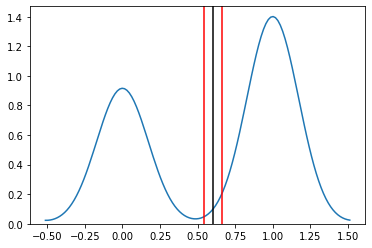

In [14]:
# Graphically (with a plot) represent the confidence interval
# kernel density estimate
sns.kdeplot(dem_handi_infant_votes)
plt.axvline(x=CI_array[0], color='r')
plt.axvline(x=CI_array[1], color='r')
plt.axvline(x=big_mean, color='k');

In [0]:
#Interpret the confidence interval - what does it tell you about the data and its distribution?
# First, I and going to find the means for the republicans on the handicap infants legislation. 

In [16]:
rep_handi_infant_votes = rep_votes['handicapped-infants'].dropna().values.tolist()
rep_mean = np.mean(rep_handi_infant_votes)
rep_mean

0.18787878787878787

In [0]:
# Because the proportion of republican congressman who voted in favor for the 
# legistation (18.8%) was outside of the confidence interval of democrats who voted
# in favor of the legistation (54.5% to 66.5%) I must reject the null hypothesis that 
# the difference is due to chance. 

In [0]:
# Take a dataset that we have used in the past in class that has categorical variables. 
# Pick two of those categorical variables and run a chi-squared tests on that data
## Part 1: In a single line using Scipy


In [18]:
#I am going to work with this data set 
tipdata = pd.read_csv("https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv")
tipdata.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tipdata.shape

(244, 8)

In [20]:
tipdata.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
tipdata.dtypes

Unnamed: 0      int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [22]:
# Cross tabe between sex and smoker
observed = pd.crosstab(tipdata['sex'], tipdata['smoker']).values
observed

array([[54, 33],
       [97, 60]])

In [28]:
stats.chi2_contingency(observed)

(0.008763290531773594, 0.925417020494423, 1, array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

In [0]:
# My P value is 0.925, which means that I cannot reject the null 
# hypothesis sex and smoking are independent. 

In [0]:
# Take a dataset that we have used in the past in class that has categorical variables. 
# Pick two of those categorical variables and run a chi-squared tests on that data
## Part 2: By hand using Numpy

In [32]:
expected = stats.contingency.expected_freq(observed)
expected

array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]])

In [33]:
rrchisquaretest = ((observed-expected)**2/expected).sum()
rrchisquaretest

0.001934818536627623

In [0]:
# I see that the t-statistics are similar but not identical. .009 vs. .002 respectively. 

In [36]:
# determining the degrees of freedom
# Using this schnazzy function- 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html

rows_expected = np.size(expected,1)
print(rows_expected)
columns_expected = np.size(expected,0)
print(columns_expected)

2
2


In [38]:
deg_freedom = (rows_expected-1)*(columns_expected-1)
deg_freedom

1

In [0]:
# Using this converter: https://stattrek.com/online-calculator/chi-square.aspx 
# or this https://www.socscistatistics.com/pvalues/chidistribution.aspx
# I see that the p value is .964 (which is close to but not identical to 
# the Scipy function)

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)